<a href="https://colab.research.google.com/github/mlaricobar/solution-datathon-interbank-2020/blob/desarrollo/piloto_v1-rimac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive, files

import pandas as pd
import numpy as np
import re

In [3]:
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
%cd /gdrive/'My Drive'/Competiciones/'Rimac-2022'
!ls -lh '[00] Data'

/gdrive/My Drive/Competiciones/Rimac-2022
total 581M
-rw------- 1 root root  68M Apr  9 20:15  demografica.csv
-rw------- 1 root root  26K Apr  9 20:15 'Diccionario de Variables.csv'
-rw------- 1 root root  143 Apr  9 22:17 'Diccionario de Variables.gsheet'
-rw------- 1 root root 261M Apr  9 20:15  gestion_total_t.csv
-rw------- 1 root root 151M Apr  9 20:15  informacion_crediticia.csv
-rw------- 1 root root  46M Apr  9 20:15  leads_total_t.csv
-rw------- 1 root root 972K Apr  9 20:15  sampleSubmission.csv
-rw------- 1 root root  17M Apr  9 20:15  socioeconomica.csv
-rw------- 1 root root 1.5M Apr  9 20:15  test.csv
-rw------- 1 root root  38M Apr  9 20:15  train.csv


In [5]:
def optimizar_df(df):
  
  for col_ in df.select_dtypes(include=[int]).columns:
    df[col_] = pd.to_numeric(df[col_], downcast="unsigned")

  for col_ in df.select_dtypes(include=[float]).columns:
    df[col_] = pd.to_numeric(df[col_], downcast="float")
  
  return df

In [6]:
df_train = optimizar_df(pd.read_csv("[00] Data/train.csv"))
df_test = optimizar_df(pd.read_csv("[00] Data/test.csv"))

In [7]:
df_train.head()

,id,idlead,numero_gestion,conversion
0,544149,629432,29,0
1,556197,632256,42,0
2,559683,6331:6,37,0
3,708074,692113,30,0
4,716983,695233,43,0


In [8]:
df_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087385 entries, 0 to 2087384
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              2087385 non-null  uint32
 1   idlead          2087385 non-null  object
 2   numero_gestion  2087385 non-null  uint16
 3   conversion      2087385 non-null  uint8 
dtypes: object(1), uint16(1), uint32(1), uint8(1)
memory usage: 29.9+ MB


In [9]:
df_train.shape[0], df_train["id"].nunique(), df_train["idlead"].nunique(), df_train["numero_gestion"].nunique()

(2087385, 2087385, 304241, 368)

In [10]:
df_train_agg = df_train.groupby(["idlead"], as_index=False).agg(count_numero_gestion=('numero_gestion', 'count'),
                                                 max_numero_gestion=('numero_gestion', 'max'),
                                                 mean_conversion=('conversion', 'mean'),
                                                 sum_conversion=('conversion', 'sum'),
                                                 )

#del df_train_agg

In [11]:
df_train_agg

,idlead,count_numero_gestion,max_numero_gestion,mean_conversion,sum_conversion
0,2111121,3,2,0.0,0
1,2111126,2,1,0.0,0
2,2111129,29,28,0.0,0
3,2111132,1,0,0.0,0
4,2111133,4,3,0.0,0
...,...,...,...,...,...
304236,::::68,18,17,0.0,0
304237,::::75,1,0,1.0,1
304238,::::94,32,31,0.0,0
304239,::::99,18,17,0.0,0


In [12]:
df_train_filtered = df_train.loc[(df_train["numero_gestion"] > 0) & (df_train["numero_gestion"] <= 20)].reset_index(drop=True)

In [13]:
print("Total de registros: {0:,}".format(df_train.shape[0]))
print("Total de registros filtrados: {0:,}".format(df_train_filtered.shape[0]))

Total de registros: 2,087,385
Total de registros filtrados: 1,468,019


In [14]:
df_test.head()

,id,idlead,numero_gestion
0,2115922,258:14:,1
1,2130413,2711426,1
2,2132695,2728394,1
3,2136936,2758931,1
4,2156673,289:3:7,1


In [15]:
df_test.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82887 entries, 0 to 82886
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              82887 non-null  uint32
 1   idlead          82887 non-null  object
 2   numero_gestion  82887 non-null  uint8 
dtypes: object(1), uint32(1), uint8(1)
memory usage: 1.0+ MB


In [16]:
df_test_agg = df_test.groupby(["idlead"], as_index=False).agg(count_numero_gestion=('numero_gestion', 'count'),
                                                 max_numero_gestion=('numero_gestion', 'max')
                                                 )

In [17]:
df_test_agg

,idlead,count_numero_gestion,max_numero_gestion
0,2283:97,1,6
1,2283::1,1,11
2,2283::4,1,17
3,2284119,1,7
4,2284126,1,13
...,...,...,...
82882,2:32432,1,2
82883,2:32453,1,11
82884,2:32562,1,5
82885,2:3257:,1,6


Train y Test, la misma distribución?

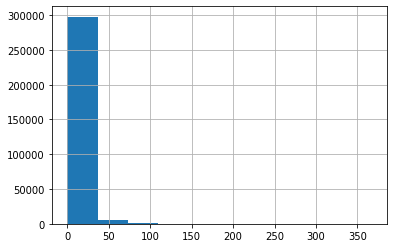

In [18]:
df_train_agg["max_numero_gestion"].hist()

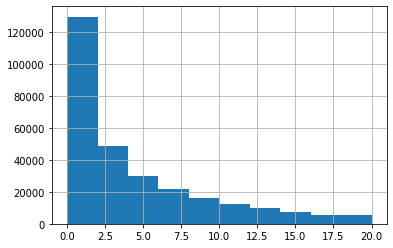

In [19]:
df_train_agg.loc[df_train_agg["max_numero_gestion"] <= 20, "max_numero_gestion"].hist()

In [20]:
df_train.loc[df_train["numero_gestion"] <= 20].groupby("numero_gestion", as_index=False).agg({"conversion": "mean", "idlead": "count"}).sort_values(by=["conversion"],
                                                                                                                                 ascending=[False],
                                                                                                                                 
                                                                                                                                 )

,numero_gestion,conversion,idlead
1,1,0.012834,213269
2,2,0.011012,174724
3,3,0.008048,146870
0,0,0.006837,304241
4,4,0.006051,125930
5,5,0.004754,109371
6,6,0.004743,95937
7,7,0.004120,84218
9,9,0.003579,65652
8,8,0.003475,74248


In [21]:
df_train.loc[df_train["idlead"] == '2111121']

,id,idlead,numero_gestion,conversion
324779,1493837,2111121,0,0
535240,1493838,2111121,1,0
894622,1493839,2111121,2,0


In [22]:
df_test_agg.loc[df_test_agg["max_numero_gestion"] > 19]

,idlead,count_numero_gestion,max_numero_gestion
45,2284582,1,20
65,228485:,1,20
81,2285123,1,20
85,228518:,1,20
101,2285462,1,20
...,...,...,...
81833,29:626:,1,20
81841,29:6346,1,20
81851,29:6488,1,20
81960,29:9989,1,20


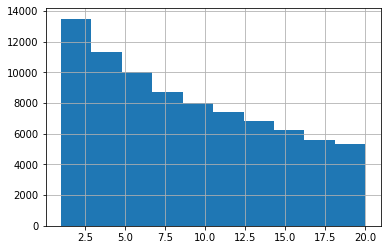

In [23]:
df_test_agg["max_numero_gestion"].hist()

Si un lead es contactado y se vuelve cliente, vuelve a ser contactado? Pues lo más obvio es que no.

In [24]:
df_test.groupby("numero_gestion", as_index=False).agg({"idlead": "count"})

,numero_gestion,idlead
0,1,7100
1,2,6397
2,3,5873
3,4,5439
4,5,5155
5,6,4862
6,7,4487
7,8,4223
8,9,4076
9,10,3915


In [25]:
df_test.head()

,id,idlead,numero_gestion
0,2115922,258:14:,1
1,2130413,2711426,1
2,2132695,2728394,1
3,2136936,2758931,1
4,2156673,289:3:7,1


In [26]:
df_test["conversion"] = 0
df_train_filtered["base"] = "train"
df_test["base"] = "test"

In [27]:
df_target = pd.concat([df_train_filtered, df_test]).reset_index(drop=True)

In [28]:
(100.0 * df_train_filtered["conversion"].mean())

0.6350054052433927

# Feature Engineering

In [29]:
df_gestion = optimizar_df(pd.read_csv("[00] Data/gestion_total_t.csv"))

In [30]:
df_gestion.head()

,idlead,numero_gestion,fecha_ini,fecha_fin,nivel1,nivel2,nivel3,tipo_gestion
0,2124895,52,2020-11-10 16:22:57 UTC,2020-11-10 16:23:26 UTC,ERROR DE TELÉFONO,ERROR DE TELÉFONO,NO CORRESPONDE,PREDICTIVO
1,2128337,28,2020-10-20 09:18:21 UTC,2020-10-20 09:18:42 UTC,ERROR DE TELÉFONO,ERROR DE TELÉFONO,NO CORRESPONDE,PREDICTIVO
2,212:267,27,2020-10-06 10:48:52 UTC,2020-10-06 10:51:08 UTC,CONTACTO EFECTIVO,NO ACEPTA CAMPAÑA,COSTO ELEVADO,PREDICTIVO
3,213:23:,30,2020-11-06 13:06:16 UTC,2020-11-06 13:10:21 UTC,CONTACTO EFECTIVO,NO ACEPTA CAMPAÑA,PERDIDO / COBERTURA INSUFICIENTE,MANUAL
4,2142489,31,2020-11-04 10:04:27 UTC,2020-11-04 10:05:58 UTC,NO GESTIÓN DE VENTA,NO GESTIÓN DE VENTA,CONSULTAS Y RECLAMOS/NO GESTIÓN DE VENTA,PREDICTIVO


In [31]:
df_leads = optimizar_df(pd.read_csv("[00] Data/leads_total_t.csv"))

In [32]:
df_target_1 = df_target.merge(df_leads, how="left", on=["idlead"])

In [33]:
df_target_1.head()

,id,idlead,numero_gestion,conversion,base,periodo,id_persona,fecha,tipolead,fechalead,flag_celular,finalizado,origen,origenmedio,plataforma,tipocanal
0,21126,347271,1,0,train,2019-02-01,BY.3988974,2019-02-13,LEAD-ADS,2019-02-13 19:56:30+00,1,1.0,FACEBOOK,ads,Lead Ads,Canales Pagados Frubis
1,30622,363447,1,0,train,2019-03-01,BY.4345624,2019-03-03,LEAD-ADS,2019-03-03 20:33:16+00,1,1.0,FACEBOOK,ads,Lead Ads,Canales Pagados Frubis
2,36744,373334,1,0,train,2019-03-01,BY.4638543,2019-03-15,NaN,2019-03-15 00:06:17+00,1,1.0,facebook,paid,Formulario,Canales Pagados Frubis
3,41409,379394,1,0,train,2019-03-01,BY.4111971,2019-03-21,NaN,2019-03-21 13:01:05+00,1,1.0,rimac,pdp_salud_plan_full_salud,Formulario,Canales No Pagados
4,45471,385224,1,0,train,2019-03-01,BY.2889618,2019-03-27,LEAD-ADS,2019-03-27 07:00:48+00,1,1.0,FACEBOOK,ads,Lead Ads,Canales Pagados Frubis


In [34]:
#field_ = "origen"
def get_intersect_values(df_target_1, field_):
  df_target_1[field_] = df_target_1[field_].str.upper()
  origen_list = list(set(df_target_1.loc[df_target_1["base"] == "train", field_].unique()) & set(df_target_1.loc[df_target_1["base"] == "test", field_].unique()))
  df_target_1.loc[~df_target_1[field_].isin(origen_list), field_] = np.nan
  df_target_1[field_] = df_target_1[field_].fillna("NA")
  return df_target_1

In [35]:
def get_descriptive_info(df_target_1, field_):
  df_target_1_pivot = df_target_1.pivot_table(index=field_, columns=["base"], values=["conversion"], aggfunc=["mean", "count"])
  df_target_1_pivot.columns = ["_".join(c) for c in df_target_1_pivot.columns]
  df_target_1_pivot["participacion_test"] = round((100.00 * df_target_1_pivot["count_conversion_test"]) / df_target_1_pivot["count_conversion_test"].sum(), 2)
  df_target_1_pivot["participacion_train"] = round((100.00 * df_target_1_pivot["count_conversion_train"]) / df_target_1_pivot["count_conversion_train"].sum(), 2)
  df_target_1_pivot["mean_conversion_train"] = round(df_target_1_pivot["mean_conversion_train"] * 100.00, 2)
  return df_target_1_pivot

In [36]:
for col in ["tipolead", "origen", "origenmedio", "plataforma", "tipocanal"]:
  df_target_1 = get_intersect_values(df_target_1, col)

In [37]:
df_target_1.loc[pd.notnull(df_target_1["id_persona"]), "id_persona_count_dot"] = df_target_1.loc[pd.notnull(df_target_1["id_persona"]), "id_persona"].apply(lambda s: s.count("."))
df_target_1["id_persona_count_double_dot"] = df_target_1["id_persona"].str.count(":")

In [38]:
get_descriptive_info(df_target_1, "id_persona_count_dot")

,mean_conversion_test,mean_conversion_train,count_conversion_test,count_conversion_train,participacion_test,participacion_train
id_persona_count_dot,,,,,,
1.0,0.0,0.73,68303,1218123,87.45,86.76
3.0,0.0,0.05,9806,185937,12.55,13.24


In [39]:
dummy_cols = [""]

In [40]:
df_gestion.head()

,idlead,numero_gestion,fecha_ini,fecha_fin,nivel1,nivel2,nivel3,tipo_gestion
0,2124895,52,2020-11-10 16:22:57 UTC,2020-11-10 16:23:26 UTC,ERROR DE TELÉFONO,ERROR DE TELÉFONO,NO CORRESPONDE,PREDICTIVO
1,2128337,28,2020-10-20 09:18:21 UTC,2020-10-20 09:18:42 UTC,ERROR DE TELÉFONO,ERROR DE TELÉFONO,NO CORRESPONDE,PREDICTIVO
2,212:267,27,2020-10-06 10:48:52 UTC,2020-10-06 10:51:08 UTC,CONTACTO EFECTIVO,NO ACEPTA CAMPAÑA,COSTO ELEVADO,PREDICTIVO
3,213:23:,30,2020-11-06 13:06:16 UTC,2020-11-06 13:10:21 UTC,CONTACTO EFECTIVO,NO ACEPTA CAMPAÑA,PERDIDO / COBERTURA INSUFICIENTE,MANUAL
4,2142489,31,2020-11-04 10:04:27 UTC,2020-11-04 10:05:58 UTC,NO GESTIÓN DE VENTA,NO GESTIÓN DE VENTA,CONSULTAS Y RECLAMOS/NO GESTIÓN DE VENTA,PREDICTIVO


In [41]:
df_target_2 = df_target_1.merge(df_gestion, how="left", on=["idlead", "numero_gestion"])

In [42]:
df_target_1.shape[0], df_target_2.shape[0]

(1550906, 1550906)

In [45]:
df_target_2["fecha_ini"] = pd.to_datetime(df_target_2["fecha_ini"], yearfirst=True)
df_target_2["fecha_fin"] = pd.to_datetime(df_target_2["fecha_fin"], yearfirst=True)

In [46]:
df_target_2["fechalead"] = pd.to_datetime(df_target_2["fechalead"])

In [47]:
df_target_2["diff_lead_attention"] = (df_target_2["fecha_fin"] - df_target_2["fecha_ini"]).dt.seconds

In [48]:
df_target_2["fechalead_weeknumber"] = df_target_2["fechalead"].dt.dayofweek
df_target_2["fechalead_day"] = df_target_2["fechalead"].dt.day
df_target_2["fechalead_month"] = df_target_2["fechalead"].dt.month
df_target_2["fechalead_hour"] = df_target_2["fechalead"].dt.hour

In [49]:
df_target_2["fecha_ini_weeknumber"] = df_target_2["fecha_ini"].dt.dayofweek
df_target_2["fecha_ini_day"] = df_target_2["fecha_ini"].dt.day
df_target_2["fecha_ini_month"] = df_target_2["fecha_ini"].dt.month
df_target_2["fecha_ini_hour"] = df_target_2["fecha_ini"].dt.hour

In [50]:
df_target_2.groupby(["idlead"], as_index=False).agg({"numero_gestion": "count", "conversion": "sum"}).sort_values(by=["conversion", "numero_gestion"], ascending=[False, False])

,idlead,numero_gestion,conversion
1811,2123::2,20,1
7325,214:4::,20,1
10934,2171917,20,1
11827,2176989,20,1
12602,2181265,20,1
...,...,...,...
296127,:::847,1,0
296131,:::867,1,0
296148,::::21,1,0
296151,::::49,1,0


In [51]:
df_target_2

,id,idlead,numero_gestion,conversion,base,periodo,id_persona,fecha,tipolead,fechalead,...,tipo_gestion,diff_lead_attention,fechalead_weeknumber,fechalead_day,fechalead_month,fechalead_hour,fecha_ini_weeknumber,fecha_ini_day,fecha_ini_month,fecha_ini_hour
0,21126,347271,1,0,train,2019-02-01,BY.3988974,2019-02-13,LEAD-ADS,2019-02-13 19:56:30+00:00,...,MANUAL,697.0,2,13,2,19,5.0,16.0,2.0,9.0
1,30622,363447,1,0,train,2019-03-01,BY.4345624,2019-03-03,LEAD-ADS,2019-03-03 20:33:16+00:00,...,PROGRESIVO,348.0,6,3,3,20,0.0,4.0,3.0,13.0
2,36744,373334,1,0,train,2019-03-01,BY.4638543,2019-03-15,NA,2019-03-15 00:06:17+00:00,...,PROGRESIVO,506.0,4,15,3,0,4.0,15.0,3.0,10.0
3,41409,379394,1,0,train,2019-03-01,BY.4111971,2019-03-21,NA,2019-03-21 13:01:05+00:00,...,PROGRESIVO,659.0,3,21,3,13,3.0,21.0,3.0,13.0
4,45471,385224,1,0,train,2019-03-01,BY.2889618,2019-03-27,LEAD-ADS,2019-03-27 07:00:48+00:00,...,PROGRESIVO,47.0,2,27,3,7,2.0,27.0,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550901,2093796,2361:51,20,0,test,2021-02-01,QF.EOJ.52797779.2:94123:,2021-02-05,COTIZADOR,2021-02-05 06:30:24+00:00,...,PREDICTIVO,0.0,4,5,2,6,3.0,11.0,2.0,12.0
1550902,2104468,2474237,20,0,test,2021-04-01,BY.362:744,2021-04-01,COMPRAR,2021-04-01 14:50:44+00:00,...,PREDICTIVO,13.0,3,1,4,14,3.0,15.0,4.0,12.0
1550903,2129849,26:7245,20,0,test,2021-07-01,NaN,2021-07-08,COMPRAR,2021-07-08 00:47:35+00:00,...,PROGRESIVO,136.0,3,8,7,0,2.0,14.0,7.0,13.0
1550904,2153895,28772:1,20,0,test,2021-10-01,QF.EOJ.831:53:3.3112152:,2021-10-08,COMPRAR,2021-10-08 08:39:36+00:00,...,PROGRESIVO,59.0,4,8,10,8,3.0,21.0,10.0,10.0


In [52]:
df_gestion.loc[df_gestion["idlead"] == "2361:51"]

,idlead,numero_gestion,fecha_ini,fecha_fin,nivel1,nivel2,nivel3,tipo_gestion
454567,2361:51,1,2021-02-05 07:59:59 UTC,2021-02-05 08:02:50 UTC,CONTACTO EFECTIVO,VOLVER A LLAMAR,NO SE EXPLICÓ PRODUCTO,PROGRESIVO
779516,2361:51,2,2021-02-05 11:09:02 UTC,2021-02-05 11:19:23 UTC,CONTACTO EFECTIVO,AGENDADO,POTENCIAL - SE EXPLICÓ PRODUCTO,MANUAL
976470,2361:51,3,2021-02-05 11:19:46 UTC,2021-02-05 11:19:46 UTC,MENSAJE WHATSAPP,MENSAJE WHATSAPP,MENSAJE WHATSAPP,MANUAL
1198150,2361:51,4,2021-02-06 15:02:00 UTC,2021-02-06 15:03:07 UTC,CONTACTO EFECTIVO,AGENDADO,POTENCIAL - SE EXPLICÓ PRODUCTO,MANUAL
1277359,2361:51,5,2021-02-08 16:26:53 UTC,2021-02-08 16:29:19 UTC,NO CONTACTO,NO CONTACTO,NO CONTESTA,MANUAL
1503971,2361:51,6,2021-02-08 16:28:12 UTC,2021-02-08 16:28:12 UTC,MENSAJE WHATSAPP,MENSAJE WHATSAPP,MENSAJE WHATSAPP,MANUAL
1631195,2361:51,7,2021-02-09 09:17:51 UTC,2021-02-09 09:17:51 UTC,NO CONTACTO,NO CONTACTO,NO CONTESTA,PREDICTIVO
1721926,2361:51,8,2021-02-09 10:39:20 UTC,2021-02-09 10:39:20 UTC,NO CONTACTO,NO CONTACTO,NO CONTESTA,PREDICTIVO
1827013,2361:51,9,2021-02-09 11:12:19 UTC,2021-02-09 11:12:19 UTC,NO CONTACTO,NO CONTACTO,NO CONTESTA,PREDICTIVO
1943197,2361:51,10,2021-02-09 12:04:38 UTC,2021-02-09 12:04:38 UTC,NO CONTACTO,NO CONTACTO,NO CONTESTA,PREDICTIVO


In [56]:
df_gestion.groupby(["nivel3"], as_index=False).agg({"idlead": "count"})

,nivel3,idlead
0,AGENDA WHATSAPP,13671
1,CERRADO POR ACW,26055
2,CLIENTE CORTA LLAMADA,50599
3,CLIENTE DESEA QUE LO VUELVAN A CONTACTAR,101879
4,CLIENTE REALIZARA CONSULTA CON CORREDOR,138
...,...,...
67,VISITA PRESENCIAL,188
68,YA FUE ATENDIDO,10907
69,YA TIENE SEGURO,1168
70,YA TIENE SEGURO AMI,227


In [1]:
df_test

NameError: ignored

In [133]:
df_target_1.groupby(["origen"], as_index=False).agg({"idlead": "count"})

In [109]:
df_target_1.groupby(["periodo"], as_index=False).agg({"idlead": "count"})

,periodo,idlead
0,2019-01-01,3844
1,2019-02-01,4879
2,2019-03-01,7456
3,2019-04-01,21232
4,2019-05-01,69647
5,2019-06-01,51167
6,2019-07-01,55522
7,2019-08-01,69551
8,2019-09-01,72755
9,2019-10-01,45203


In [104]:
df_leads.shape[0], df_leads["idlead"].nunique()

(387128, 387128)

In [117]:
df_leads["fecha_weeknumber"] = pd.to_datetime(df_leads["fechalead"]).dt.dayofweek
df_leads["fecha_day"] = pd.to_datetime(df_leads["fechalead"]).dt.day
df_leads["fecha_month"] = pd.to_datetime(df_leads["fechalead"]).dt.month
df_leads["fecha_hour"] = pd.to_datetime(df_leads["fechalead"]).dt.hour

In [120]:
df_leads.groupby("origen", as_index=False).agg({"idlead": "count"})

,origen,idlead
0,BING,37
1,CHATBOT,12
2,CLO,45
3,COMPARABIEN,186
4,CYBERDAYS,1
5,CYBERWOW,4
6,Chatbot_Tobi,1
7,ELCOMERCIO,9
8,EMAILING,2637
9,FACEBOOK,60796


In [119]:
df_leads

,idlead,periodo,id_persona,fecha,tipolead,fechalead,flag_celular,finalizado,origen,origenmedio,plataforma,tipocanal,fecha_weeknumber,fecha_day,fecha_month,fecha_hour
0,32:252,2019-01-01,BY.::81876,2019-01-24,NaN,2019-01-24 21:13:00+00,1,2.0,NaN,NaN,Formulario,Canales No Pagados,3,24,1,21
1,3296:9,2019-01-01,BY.22228346,2019-01-24,NaN,2019-01-24 11:58:28+00,1,2.0,NaN,NaN,Formulario,Canales No Pagados,3,24,1,11
2,329:65,2019-01-01,BY.22991678,2019-01-24,NaN,2019-01-24 17:43:25+00,1,2.0,NaN,NaN,Formulario,Canales No Pagados,3,24,1,17
3,329599,2019-01-01,BY.41344:94,2019-01-24,NaN,2019-01-24 10:38:49+00,1,2.0,NaN,NaN,Formulario,Canales No Pagados,3,24,1,10
4,329763,2019-01-01,BY.7669:45,2019-01-24,NaN,2019-01-24 12:45:24+00,1,2.0,NaN,NaN,Formulario,Canales No Pagados,3,24,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387123,2937:17,2021-11-01,BY.327978:3,2021-11-12,comprar,2021-11-12 00:01:15+00,1,NaN,Internal Campaigns,publica:producto-salud-flexible,Comprar,Canales No Pagados,4,12,11,0
387124,2939283,2021-11-01,BY.41845:15,2021-11-12,comprar,2021-11-12 18:00:13+00,1,NaN,Internal Campaigns,publica:producto-salud-flexible,Comprar,Canales No Pagados,4,12,11,18
387125,2938869,2021-11-01,BY.8838564,2021-11-12,comprar,2021-11-12 13:42:56+00,1,1.0,Internal Campaigns,estar-bien-salud:pilar-tu-salud,Comprar,Canales No Pagados,4,12,11,13
387126,2938693,2021-11-01,BY.5832193,2021-11-12,comprar,2021-11-12 12:00:18+00,1,NaN,Internal Campaigns,publica:producto-salud,Comprar,Canales No Pagados,4,12,11,12


In [116]:
df_leads["finalizado"].value_counts(dropna=False)

1.0    220378
2.0     97402
NaN     35276
0.0     18498
3.0     15017
4.0       263
7.0       137
6.0        82
5.0        70
8.0         5
Name: finalizado, dtype: int64

In [110]:
df_test_1 = df_test.merge(df_leads, how="left", on=["idlead"])

In [111]:
df_test_1.groupby(["periodo"], as_index=False).agg({"idlead": "count"})

,periodo,idlead
0,2021-01-01,5557
1,2021-02-01,5526
2,2021-03-01,5891
3,2021-04-01,7250
4,2021-05-01,10529
5,2021-06-01,6349
6,2021-07-01,6614
7,2021-08-01,9669
8,2021-09-01,7068
9,2021-10-01,7073
